In [1]:
# Load the "autoreload" extension so that code can change
# Always reload modules so that as soon as code changes in src, it gets automatically reloaded without kernel relaunch
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../') 

from src.utils import datacollector
from src.utils import constants as cst
from src.utils import utils
from src.visualization import visualization as viz
from src.visualization import query as q
from src.preprocessing import cleaning

%matplotlib inline

In [2]:
# Let's load the datasets
df_lst = pd.read_csv(datacollector.get_data_file(cst.LISTING_FULL_FILE), sep=',', header=0, low_memory=False)
df_lst_sum = pd.read_csv(datacollector.get_data_file(cst.LISTING_LIGHT_FILE), sep=',', header=0, low_memory=False)
df_cal = pd.read_csv(datacollector.get_data_file(cst.CALENDAR_FILE), sep=',', header=0)
df_reviews = pd.read_csv(datacollector.get_data_file(cst.REVIEWS_FILE), sep=',', header=0)

# Want to know more about what's inside data ?
Welcome to the _Appendix_ section. This is not directly linked to our main objectives but as I am a curious guy, I could not resist to dig more some elements.  
Indeed, we have seen in the first [notebook](1_Data_Understanding.ipynb) that there are interesting and sometimes even strange things that deserves our attention in this dataset. Here are the things I will explore more deeply:
* Usage of the service over time since the beginning
* Hosts: where are they from when not from Paris ?
* Hosts: some of them require guest picture/phone, what kind of listings are concerned ?
* Hosts: some of them owns a lot of apartments (one even owns 323 apartments/rooms to rent). What are those listings (type, place, price, etc) ?
* Listings: one of them cost around 10000€ for 1 night. Seriously ? What is it ?
* Listings: some of them have a strange `minimum number of nights` value...what are those outliers ?
* Listings: one of them is an igloo. Really ?
* Reviews: we have seen that one listing has 31 reviews per month in average, how is that even possible ?

## Airbnb service usage
### Most ancient user in Paris
Airbnb was founded in 2008. Let's see who is the most ancient user of the service in Paris.  

In [6]:
print("The most ancient user joined on {}".format(df_lst[df_lst['host_since'].notnull()].host_since.min()))

The most ancient user joined on 2008-08-22


###  Number of users growth over time
Let's remember that in the first analysis we have seen that for the `host_since` feature in the `listings.csv.gz` dataset values were:

In [7]:
q.print_basic_info_for_feature(df_lst, 'host_since')

There are 3334 different values for the 'host_since' feature.
There are 64 missing values (0.10%).
Here is a sample:
['2008-10-14' '2009-02-14' '2008-08-30' ... '2019-07-07' '2019-07-08'
 '2019-07-09']


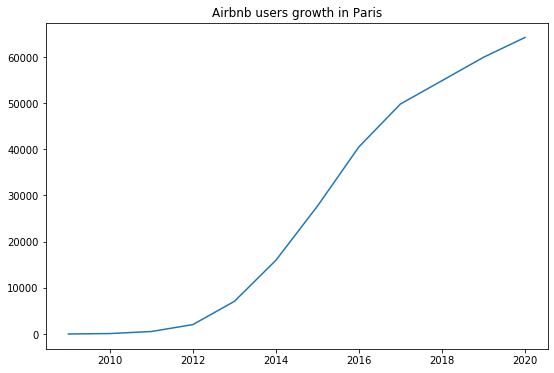

In [24]:
host_df = df_lst[df_lst['host_since'].notnull()][['host_since', 'id']]
host_df['host_since'] = pd.to_datetime(host_df['host_since'])
host_df = host_df.set_index('host_since').resample('Y')
figure, axis = plt.subplots(1, 1, figsize=(9, 6))
axis.set_title("Airbnb users growth in Paris")
sns.lineplot(data=np.cumsum(host_df.id.count()), markers=True, ax=axis)
plt.show()

Impressive, it took almost 3 to 4 years to grow up but only 5 years more to reach 50K users with a linear progression over years.

---
## Hosts exploration
### Where are they from when not from Paris or France ?
We will explore the feature `host_location` from `listings.csv.gz` dataset.

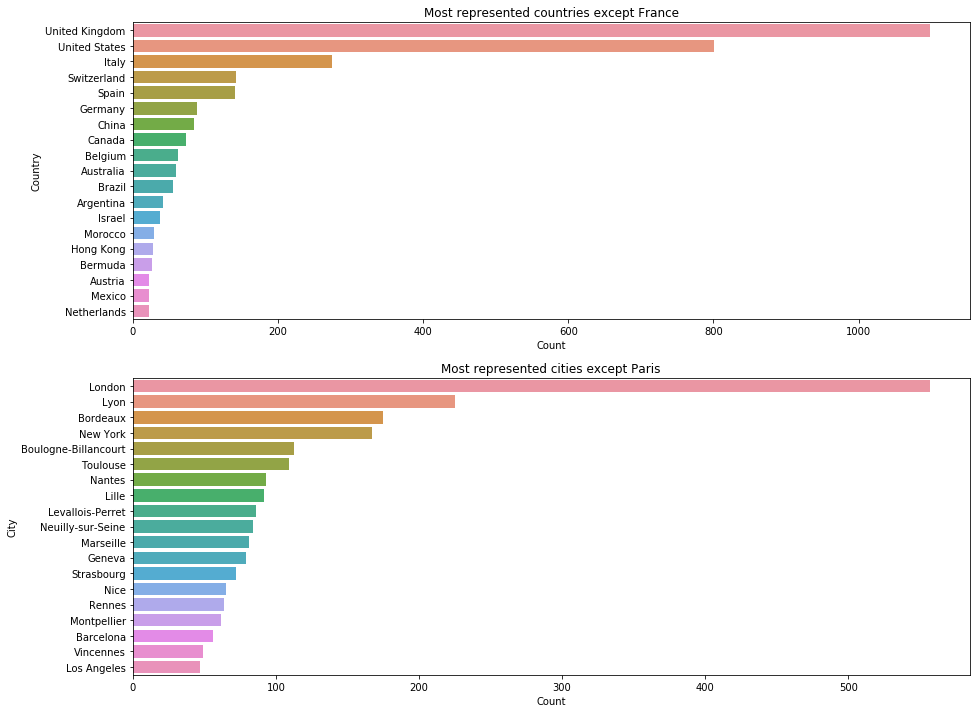

In [78]:
viz.barplot_hostlocation(df_lst)

**93.5% of owners live in France, 73.6% in Paris**. The next most represented city is not a french one but the England capital: _London_. Then we have big french cities: _Lyon_ , _Bordeaux_ , _Lille_ but not only french cities: _New York_ !!

### Hosts who requires guest picture/phone, what kind of listings are concerned ?


In [ ]:
# TODO: WIP

### Hosts with multiple listings
According to some figures in `listings.csv.gz` dataset, some of them owns a lot of apartments (one even owns 323 apartments/rooms to rent). What are those listings (type, place, price, etc) ?

In [ ]:
# TODO: WIP